In [3]:
#17.1 Training a LinearClassiﬁer
# Load libraries
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
# Load data with only two classes and two features
iris=datasets.load_iris()
features=iris.data[:100,:2]
target=iris.target[:100]
# Standardize features
scaler=StandardScaler()
features_standardized=scaler.fit_transform(features)
# Create support vector classifier
svc=LinearSVC(C=1.0)
# Train model
model=svc.fit(features_standardized,target)

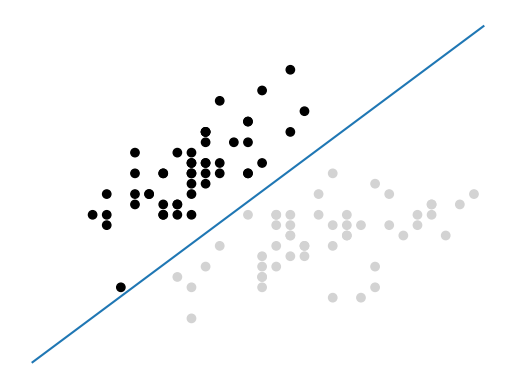

In [4]:
# Load library
from matplotlib import pyplot as plt
# Plot data points and color using their class
color=["black" if c==0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0],features_standardized[:,1],c=color)
# Create the hyperplane
w=svc.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(-2.5,2.5)
yy=a*xx-(svc.intercept_[0])/w[1]
# Plot the hyperplane
plt.plot(xx,yy)
plt.axis("off"),plt.show();

In [5]:
# Create new observation
new_observation=[[-2,3]]
# Predict class of new observation
svc.predict(new_observation)

array([0])

In [6]:
#17.2 Handling Linearly Inseparable Classes Using Kernels
# Load libraries
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
# Set randomization seed
np.random.seed(0)
# Generate two features
features=np.random.randn(200,2)
# Use a XOR gate (you don't need to know what this is) to generate# linearly inseparable classes
target_xor=np.logical_xor(features[:,0]>0,features[:,1]>0)
target=np.where(target_xor,0,1)
# Create a support vector machine with a radial basis function kernel
svc=SVC(kernel="rbf",random_state=0,gamma=1,C=1)
# Train the classifier
model=svc.fit(features,target)

In [8]:
# Plot observations and decision boundary hyperplane
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X,y,classifier):
    cmap=ListedColormap(("red","blue"))
    xx1,xx2=np.meshgrid(np.arange(-3,3,0.02),np.arange(-3,3,0.02))
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.1,cmap=cmap)
    
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                    alpha=0.8,
                    c=cmap(idx),
                    marker="+",label=cl)

In [10]:
# Create support vector classifier with a linear kernel
svc_linear=SVC(kernel="linear",random_state=0,C=1)
# Train model
svc_linear.fit(features,target)

SVC(C=1, kernel='linear', random_state=0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


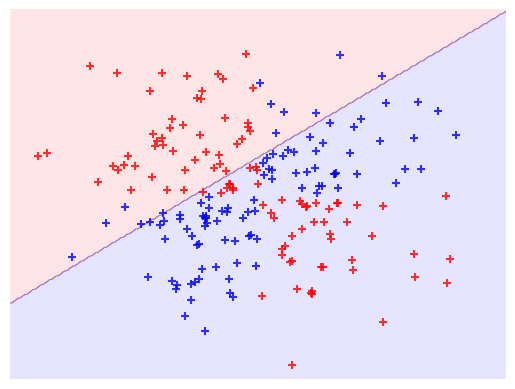

In [11]:
# Plot observations and hyperplane
plot_decision_regions(features,target,classifier=svc_linear)
plt.axis("off"),plt.show();

In [12]:
# Create a support vector machine with a radial basis function kernel
svc=SVC(kernel="rbf",random_state=0,gamma=1,C=1)
# Train the classifier
model=svc.fit(features,target)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


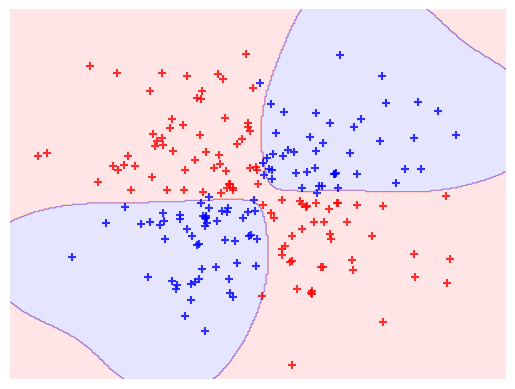

In [13]:
# Plot observations and hyperplane
plot_decision_regions(features,target,classifier=svc)
plt.axis("off"),plt.show();

In [15]:
# Load libraries
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
# Load data
iris=datasets.load_iris()
features=iris.data
target=iris.target
# Standardize features
scaler=StandardScaler()
features_standardized=scaler.fit_transform(features)
# Create support vector classifier object
svc=SVC(kernel="linear",probability=True,random_state=0)
# Train classifier
model=svc.fit(features_standardized,target)
# Create new observation
new_observation=[[.4,.4,.4,.4]]
# View predicted probabilities
model.predict_proba(new_observation)

array([[0.00541761, 0.97348825, 0.02109414]])

In [16]:
#17.4 Identifying Support Vectors
# Load libraries
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
#Load data with only two classes
iris=datasets.load_iris()
features=iris.data[:100,:]
target=iris.target[:100]
# Standardize features
scaler=StandardScaler()
features_standardized=scaler.fit_transform(features)
# Create support vector classifier object
svc=SVC(kernel="linear",random_state=0)
# Train classifier
model=svc.fit(features_standardized,target)
# View support vectors
model.support_vectors_

array([[-0.5810659 ,  0.42196824, -0.80497402, -0.50860702],
       [-1.52079513, -1.67737625, -1.08231219, -0.86427627],
       [-0.89430898, -1.4674418 ,  0.30437864,  0.38056609],
       [-0.5810659 , -1.25750735,  0.09637501,  0.55840072]])

In [17]:
model.support_

array([23, 41, 57, 98])

In [18]:
model.n_support_

array([2, 2])

In [19]:
#17.5 Handling Imbalanced Classes
# Load libraries
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
#Load data with only two classes
iris=datasets.load_iris()
features=iris.data[:100,:]
target=iris.target[:100]
# Make class highly imbalanced by removing first 40 observations
features=features[40:,:]
target=target[40:]
# Create target vector indicating if class 0, otherwise 1
target=np.where((target==0),0,1)
# Standardize features
scaler=StandardScaler()
features_standardized=scaler.fit_transform(features)
# Create support vector classifier
svc=SVC(kernel="linear",class_weight="balanced",C=1.0,random_state=0)
# Train classifier
model=svc.fit(features_standardized,target)